In [18]:
# Import the classical libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns

In [19]:
# Open the csv file
df_phi = pd.read_csv("ElectricPotential.csv")
df_A = pd.read_csv("MagneticPotential.csv")

# Store the electric potential values into a numpy array and
# reshape the potential into a 3D numpy array
potential_phi = df_phi["Electric potential"].to_numpy()
vector_A = df_A["Magnetic potential"].to_numpy()

# Work out the length of one row
length = len(potential_phi)
N = int(round(length**(1/3)))

# Convert now the potential array into three-dimensional entity
potential_phi = potential_phi.reshape(N,N,N)
vector_A = vector_A.reshape(N,N,N)

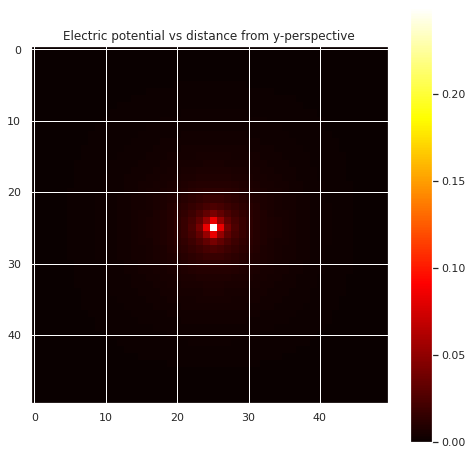

In [35]:
# Plot the potential on a 2D plane midcut
fig = plt.figure(figsize=(8,8))
potential_phi = potential_phi.reshape(N,N,N)

plt.title("Electric potential vs distance from y-perspective")
plt.imshow(potential_phi[:,int(N/2),:], cmap='hot')
plt.colorbar()
plt.show()

In [21]:
# Work out the gradient of the potential, or the electric field
# on the mid-plane cut only
E_field = np.gradient(potential_phi[:,:,int(N/2)]) 
E = np.sqrt(E_field[0]**2 + E_field[1]**2) 

<ipython-input-22-a50f10426a89>:11: RuntimeWarning: invalid value encountered in true_divide
  ax.quiver(X, Y, -E_field[1] / E, -E_field[0] / E)


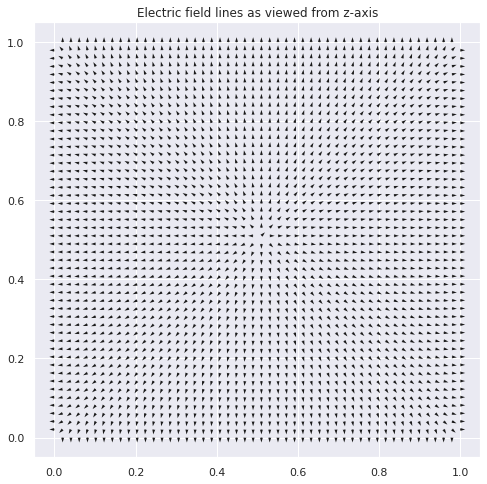

In [22]:
# Plot the electric field lines
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

# Create meshgrid in the 3D space
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)

# Now plot the field lines in three-dimensional space
ax.quiver(X, Y, -E_field[1] / E, -E_field[0] / E)
plt.title("Electric field lines as viewed from z-axis")
plt.show()

In [23]:
# Work out the radius values for each cell coordinate.
# Associate for each coordinate the distance towards the centre
radius = np.indices((N,N,N)) - 0.5 * N
radius = np.sqrt(radius[0]**2 + radius[1]**2 + radius[2]**2)

<ipython-input-24-a21f58f725d2>:7: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(radius), np.log(potential_phi))


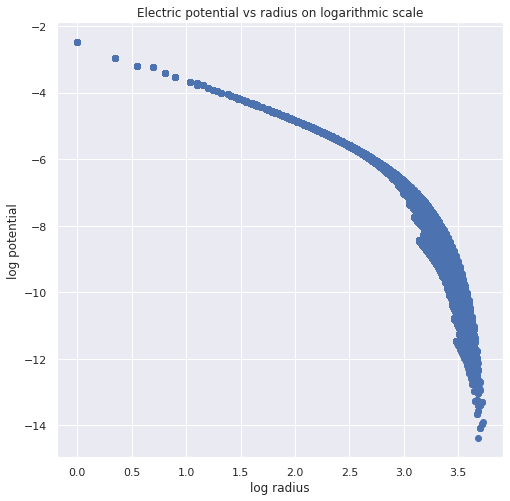

In [24]:
# Plot the electric potential as function of distance
fig = plt.figure(figsize=(8,8))
radius = radius.flatten()
potential_phi = potential_phi.flatten()

# Add the name of the plot as well as the axis labels
plt.scatter(np.log(radius), np.log(potential_phi))
sns.set_theme()
plt.title("Electric potential vs radius on logarithmic scale")
plt.xlabel("log radius")
plt.ylabel("log potential")
plt.show()

<ipython-input-25-079fc9c84d88>:15: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(radius), np.log(E))


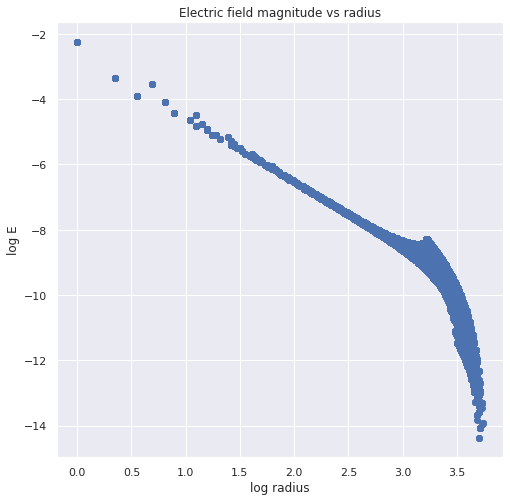

In [25]:
# Plot the electric field vs the radius on
# logarithmic scale
fig = plt.figure(figsize=(8,8))
potential_phi_copy = np.copy(potential_phi)
potential_phi = potential_phi.reshape(N,N,N)
E_field = np.gradient(potential_phi) 
E = np.sqrt(E_field[0]**2 + E_field[1]**2 + E_field[2]**2)
E = E.flatten()

# Save the electric field and radius datafile into a separate 
# entity for parameter fitting
df_E = pd.DataFrame({"Radius" : radius, "Electric potential" : potential_phi_copy, "Electric field" : E})
df_E.to_csv("Radius_phi_E.csv")

plt.scatter(np.log(radius), np.log(E))
plt.title("Electric field magnitude vs radius")
plt.xlabel("log radius")
plt.ylabel("log E")

plt.show()

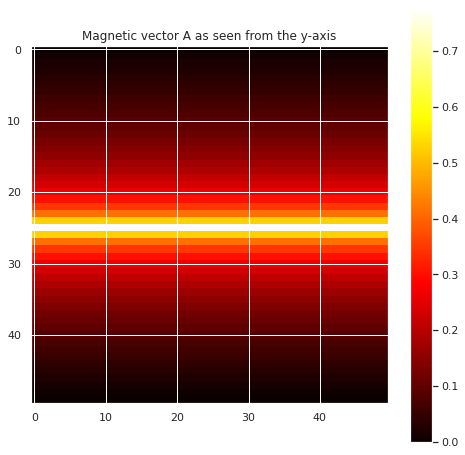

In [36]:
# Plot the contours for the magnetic potential
fig = plt.figure(figsize=(8,8))
plt.imshow(vector_A[:,int(N/2),:], cmap='hot')
plt.colorbar()
plt.title("Magnetic vector A as seen from the y-axis")
plt.show()

In [27]:
# Compute the gradient of the magnetic vector A and
# calculate the magnitude of the magnetic field. The third
# component is not taken into account, as it is 0
grad_B = np.gradient(vector_A)
B = np.sqrt(grad_B[0]**2 + grad_B[1]**2)

In [28]:
B_field = np.sqrt(grad_B[0]**2 + grad_B[1]**2)
B_field = B_field.flatten()

(125000,)
(125000,)


<ipython-input-29-b3d0690f1331>:17: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(radius_B), np.log(B_field))


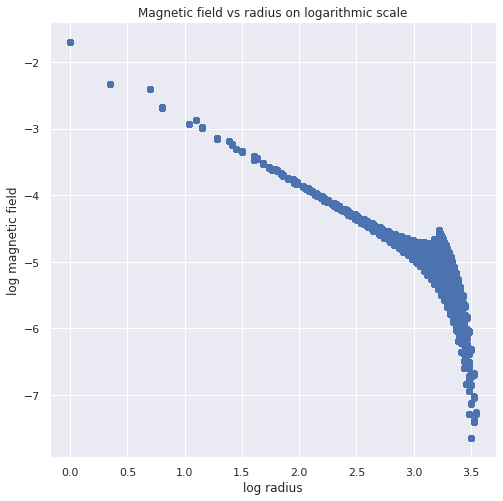

In [29]:
# Compute the radii for the distance from each point
# to the wire
radius_B = np.indices((N,N,N)) - 0.5 * N
radius_B = np.sqrt(radius_B[0]**2 + radius_B[1]**2)
radius_B = radius_B.flatten()
vector_A = vector_A.flatten()

# Save the data for parameter fitting
df_B = pd.DataFrame({"Radius" : radius_B, "Magnetic potential" : vector_A, "Magnetic field" : B_field})
df_B.to_csv("Radius_A_B.csv")

# Plot the magnetic field against the radius on
# logarithmic scale
fig = plt.figure(figsize=(8,8))
print(B_field.shape)
print(radius_B.shape)
plt.scatter(np.log(radius_B), np.log(B_field))
plt.title("Magnetic field vs radius on logarithmic scale")
plt.xlabel("log radius")
plt.ylabel("log magnetic field")
plt.show()

<ipython-input-30-76185ff58807>:4: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(radius_B), np.log(vector_A))


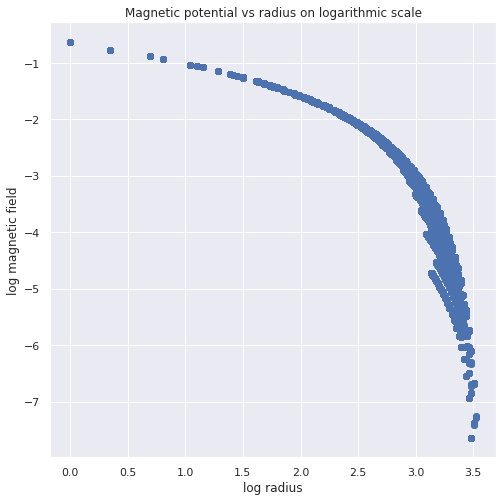

In [30]:
# Now plot the magnetic potential against the radius 
# on logarithmic scale
fig = plt.figure(figsize=(8,8))
plt.scatter(np.log(radius_B), np.log(vector_A))
plt.title("Magnetic potential vs radius on logarithmic scale")
plt.xlabel("log radius")
plt.ylabel("log magnetic field")
plt.show()

<ipython-input-31-1cde2bb53659>:16: RuntimeWarning: invalid value encountered in true_divide
  ax.quiver(X, Y, grad_B[0] / B, -grad_B[1] / B)


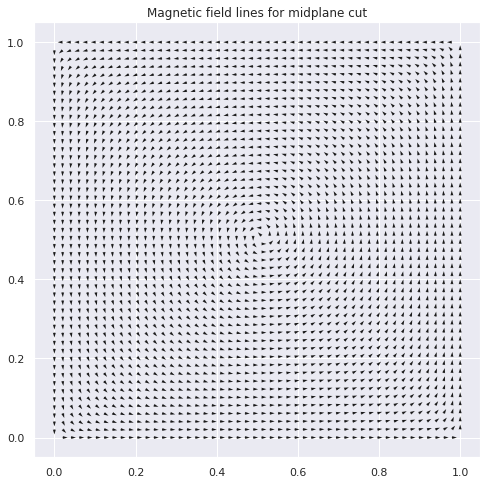

In [31]:
vector_A = vector_A.reshape(N,N,N)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

# Redesign the magnetic field only for the midplane cut
grad_B = np.gradient(vector_A[:,:,int(N/2)])
B = np.sqrt(grad_B[0]**2 + grad_B[1]**2)

# Create meshgrid in the 3D space
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)

# Now plot the field lines in three-dimensional space
ax.quiver(X, Y, grad_B[0] / B, -grad_B[1] / B)
plt.title("Magnetic field lines for midplane cut")
plt.show()

In [32]:
# Now analyse the minimum for the over-relaxation parameter
# Open up the overrelaxation parameter file
df_SOR = pd.read_csv("Over_Relaxation.csv")
omega = df_SOR["Over-relaxation parameter"].to_numpy()
iterns = df_SOR["Iterations"].to_numpy()
df_SOR.columns

Index(['Unnamed: 0', 'Over-relaxation parameter', 'Iterations'], dtype='object')

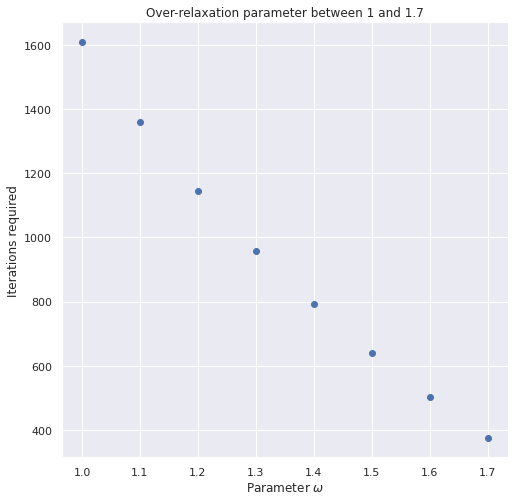

In [33]:
# Make the first plot for the decreasing trend 
# with omega between 1 and 1.8
plt.figure(figsize=(8,8))
plt.scatter(omega[omega < 1.8], iterns[np.where(omega < 1.8)])
plt.title("Over-relaxation parameter between 1 and 1.7")
plt.xlabel("Parameter $\omega$")
plt.ylabel("Iterations required")
sns.set_theme()
plt.show()

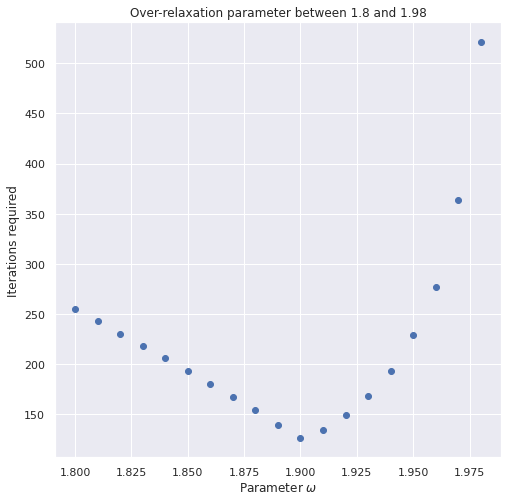

In [34]:
# Make the second plot for the omega parameter
# with the values between 1.8 and 1.98
plt.figure(figsize=(8,8))
plt.scatter(omega[omega >= 1.8], iterns[np.where(omega >= 1.8)])
plt.title("Over-relaxation parameter between 1.8 and 1.98")
plt.xlabel("Parameter $\omega$")
plt.ylabel("Iterations required")
sns.set_theme()
plt.show()